In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t[x]) * standard_units(t[y]))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t[y]) / np.std(t[x])

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t[y]) - slope(t, x, y) * np.mean(t[x])

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t[x] + b

## Residuals

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [3]:
galton = pd.read_csv('galton.csv')
heights = pd.DataFrame({'MidParent': galton['midparentHeight'], 'Child': galton['childHeight']})
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [4]:
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


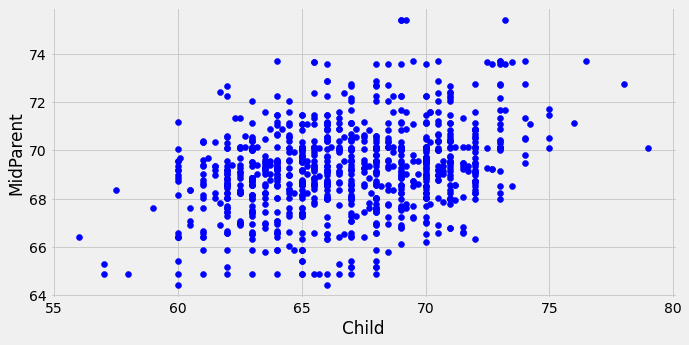

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(heights['Child'], heights['MidParent'], color='blue')
ax.set_xlabel('Child')
ax.set_ylabel('MidParent');

In [6]:
def residuals(t, x, y):
    return t[y] - fitted_values(t, x, y)

In [7]:
heights['Fitted'] = fitted_values(heights, 'Child', 'MidParent')
heights

,MidParent,Child,Fitted
0,75.43,73.2,70.249865
1,75.43,69.2,69.603394
2,75.43,69.0,69.571071
3,75.43,69.0,69.571071
4,73.66,73.5,70.298350
...,...,...,...
929,66.64,64.0,68.762982
930,66.64,62.0,68.439746
931,66.64,61.0,68.278128
932,65.27,66.5,69.167026


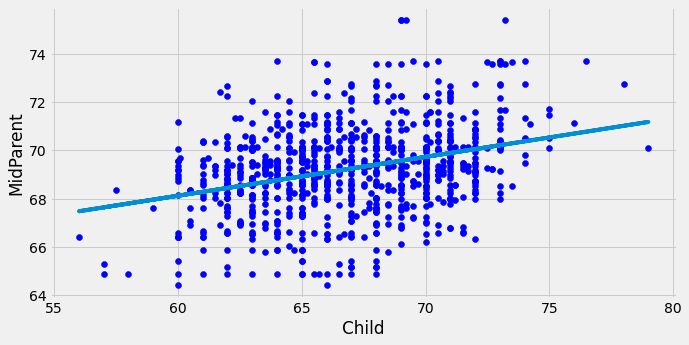

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(heights['Child'], heights['MidParent'], color='blue')
ax.set_xlabel('Child')
ax.set_ylabel('MidParent')
ax.plot(heights['Child'], heights['Fitted']);

In [9]:
heights['Residuals'] = residuals(heights, 'Child', 'MidParent')
heights

,MidParent,Child,Fitted,Residuals
0,75.43,73.2,70.249865,5.180135
1,75.43,69.2,69.603394,5.826606
2,75.43,69.0,69.571071,5.858929
3,75.43,69.0,69.571071,5.858929
4,73.66,73.5,70.298350,3.361650
...,...,...,...,...
929,66.64,64.0,68.762982,-2.122982
930,66.64,62.0,68.439746,-1.799746
931,66.64,61.0,68.278128,-1.638128
932,65.27,66.5,69.167026,-3.897026


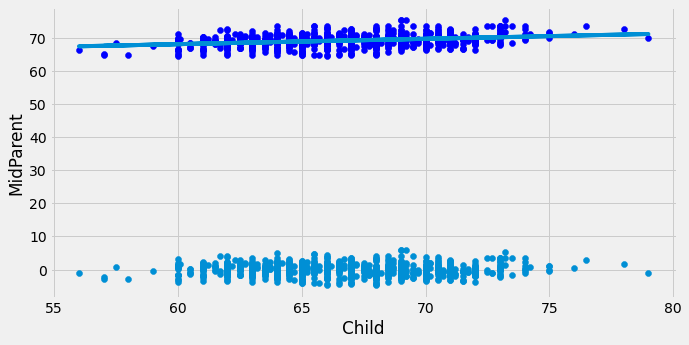

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(heights['Child'], heights['MidParent'], color='blue')
ax.set_xlabel('Child')
ax.set_ylabel('MidParent')
ax.plot(heights['Child'], heights['Fitted'])
ax.scatter(heights['Child'], heights['Residuals']);

In [14]:
def plot_residuals(t, x, y):
    f_values = fitted_values(t, x, y)
    r_values = residuals(t, x, y)
    t['Fitted'] = f_values
    t['Residual'] = r_values
    with_residuals = pd.DataFrame({x: t[x], y: t[y], 'Fitted': t['Fitted'], 'Residual': t['Residual']})
    return with_residuals

In [15]:
plot_residuals(heights, 'MidParent', 'Child')

,MidParent,Child,Fitted,Residual
0,75.43,73.2,70.712373,2.487627
1,75.43,69.2,70.712373,-1.512373
2,75.43,69.0,70.712373,-1.712373
3,75.43,69.0,70.712373,-1.712373
4,73.66,73.5,69.584244,3.915756
...,...,...,...,...
929,66.64,64.0,65.109971,-1.109971
930,66.64,62.0,65.109971,-3.109971
931,66.64,61.0,65.109971,-4.109971
932,65.27,66.5,64.236786,2.263214


In [ ]:
fig, ax = plt.f

In [12]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

In [12]:
plot_residuals(heights, 'MidParent', 'Child')

AttributeError: 'DataFrame' object has no attribute 'with_columns'

## Regression Diagnostics

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

### Nonlinearity

In [13]:
dugong = Table.read_table('dugong.csv')
dugong.show()

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [14]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

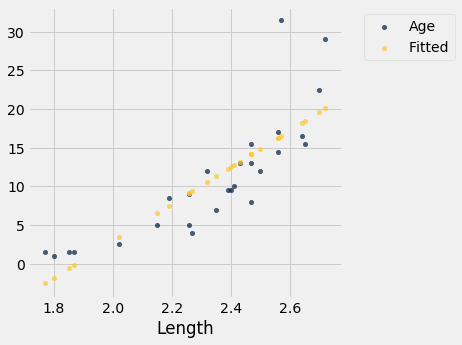

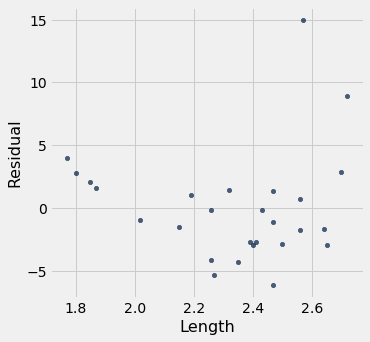

In [15]:
plot_residuals(dugong, 'Length', 'Age')

In [16]:
height_vs_average_weight = Table.read_table('us_women.csv')

In [17]:
height_vs_average_weight

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [18]:
correlation(height_vs_average_weight, 0, 1)

0.9954947677842161

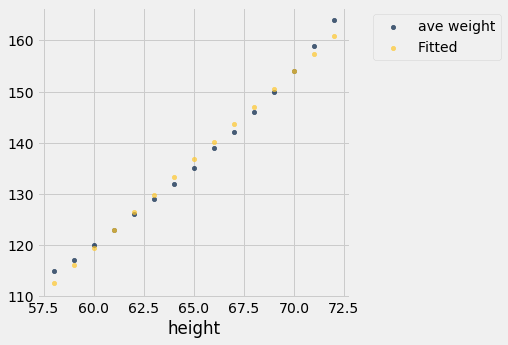

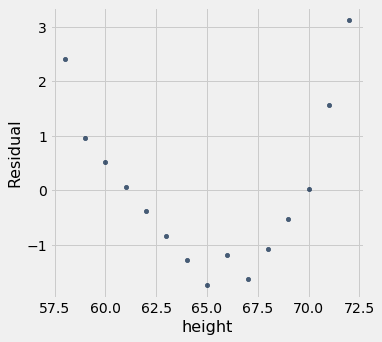

In [19]:
plot_residuals(height_vs_average_weight, 0, 1)

### A Measure of Clustering

In [20]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

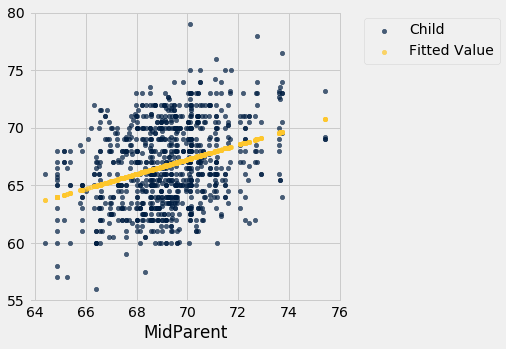

In [21]:
plot_fitted(heights, 'MidParent', 'Child')

In [22]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [23]:
np.var(fitted_values(heights, 'MidParent', 'Child')) / np.var(heights.column('Child'))

0.10300883578346642

In [24]:
correlation(heights, 'MidParent', 'Child') ** 2

0.10300883578346624

In [25]:
np.std(fitted_values(heights, 'MidParent', 'Child')) / np.std(heights.column('Child'))

0.32094989606395957

In [26]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [27]:
np.std(fitted_values(dugong, 0, 1)) / np.std(dugong.column(1))

0.8296474554905713

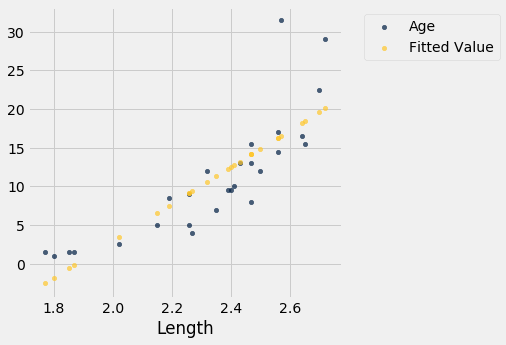

In [28]:
plot_fitted(dugong, 'Length', 'Age')

In [29]:
hybrid = Table.read_table('hybrid.csv')

In [30]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


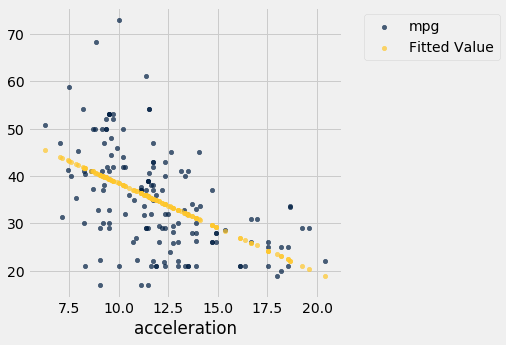

In [31]:
plot_fitted(hybrid, 'acceleration', 'mpg')

In [32]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [33]:
np.std(fitted_values(hybrid, 3, 4)) / np.std(hybrid.column(4))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [34]:
np.std(residuals(heights, 'MidParent', 'Child'))

3.3880799163953426

In [35]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [36]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

In [37]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.43273683343029

In [38]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [39]:
np.sqrt(1 - r**2) * np.std(hybrid.column('mpg'))

9.43273683343029